In [1]:
# Referred from https://www.statsmodels.org/stable/examples/notebooks/generated
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [2]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [3]:
dta = sm.datasets.sunspots.load_pandas().data

In [4]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]

<AxesSubplot:>

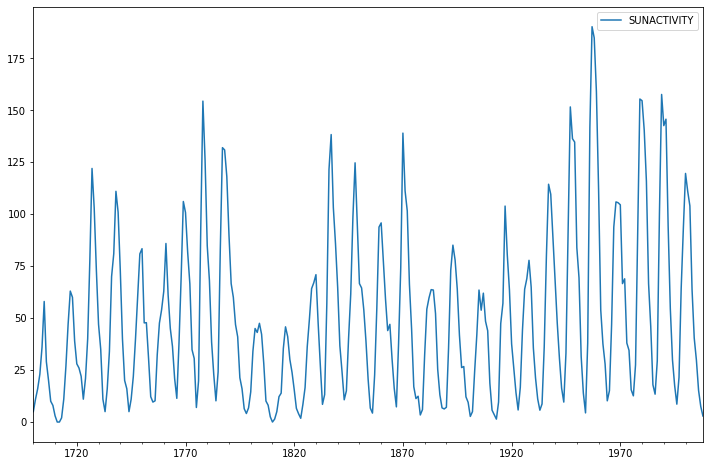

In [5]:
dta.plot(figsize=(12, 8))

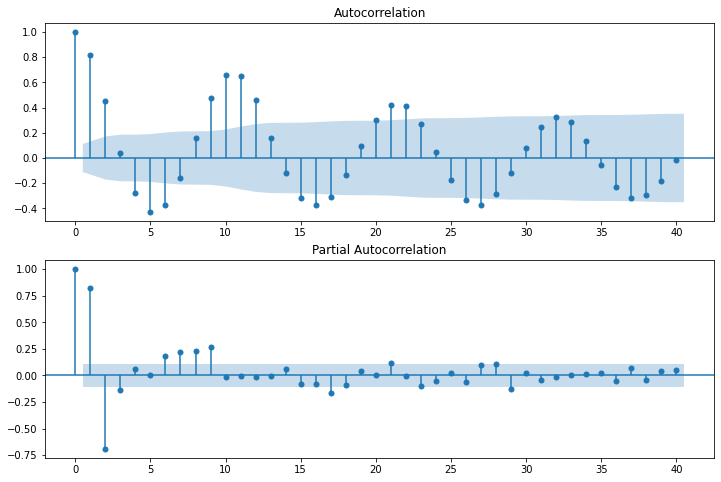

In [6]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [7]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


In [8]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

In [9]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.637093301418 2637.570458409009 2628.607481146664


In [10]:
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [11]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403629245654 2638.070335630143 2626.8666140522114


In [12]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.956495361594159

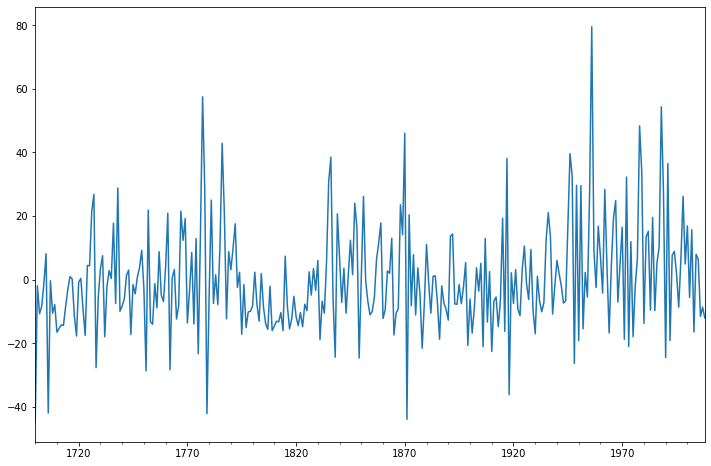

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [14]:
resid = arma_mod30.resid

In [15]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84393219896333, pvalue=1.5015079805111085e-11)

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


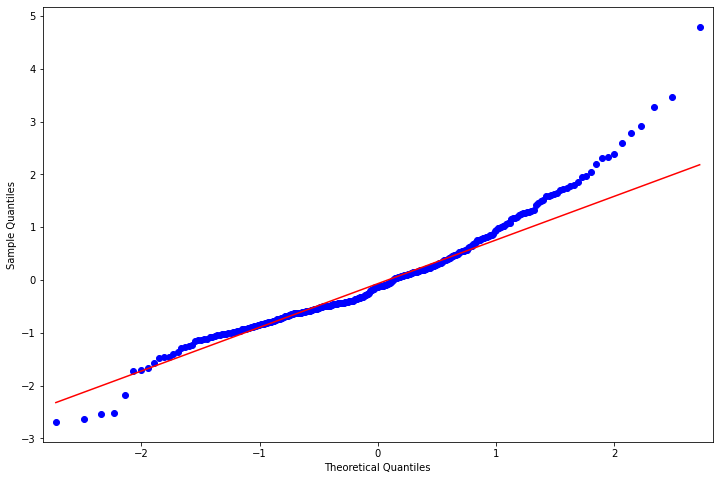

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

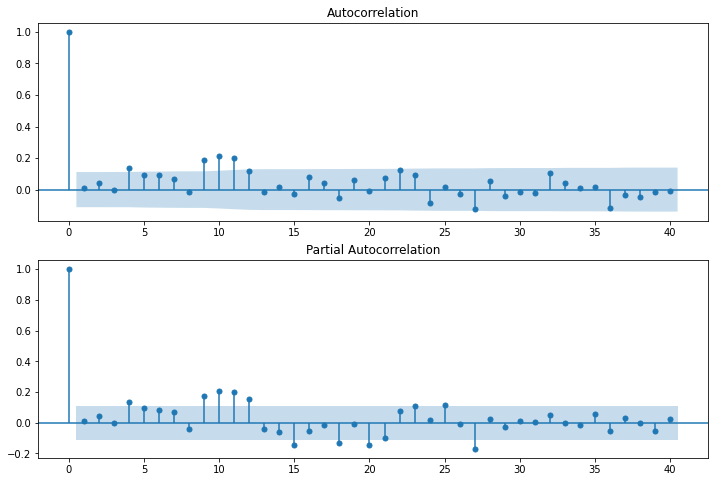

In [17]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [18]:
#r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
#data = np.c_[np.arange(1, 25), r[1:], q, p]

In [19]:
#table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
#print(table.set_index("lag"))

In [20]:
#predict_sunspots = arma_mod30.predict("1990", "2012", dynamic=True)
#print(predict_sunspots)

In [21]:
#def mean_forecast_err(y, yhat):
 #   return y.sub(yhat).mean()

In [22]:
#mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

In [23]:
#from statsmodels.tsa.arima_process import ArmaProcess

In [24]:
#np.random.seed(1234)
# include zero-th lag
#arparams = np.array([1, 0.75, -0.65, -0.55, 0.9])
#maparams = np.array([1, 0.65])

In [25]:
#arma_t = ArmaProcess(arparams, maparams)

In [26]:
#arma_t.isinvertible

In [27]:
#arma_t.isstationary

In [28]:
#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(111)
#ax.plot(arma_t.generate_sample(nsample=50))

In [29]:
#arparams = np.array([1, 0.35, -0.15, 0.55, 0.1])
#maparams = np.array([1, 0.65])
#arma_t = ArmaProcess(arparams, maparams)
#arma_t.isstationary

In [30]:
#arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

In [31]:
#fig = plt.figure(figsize=(12, 8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

In [32]:
#lags = int(10 * np.log10(arma_rvs.shape[0]))
#arma11 = ARIMA(arma_rvs, order=(1, 0, 1)).fit()
#resid = arma11.resid
#r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
#data = np.c_[range(1, lags + 1), r[1:], q, p]
#table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
#print(table.set_index("lag"))

In [33]:
#arma41 = ARIMA(arma_rvs, order=(4, 0, 1)).fit()
#resid = arma41.resid
#r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
#data = np.c_[range(1, lags + 1), r[1:], q, p]
#table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
#print(table.set_index("lag"))

In [34]:
#macrodta = sm.datasets.macrodata.load_pandas().data
#macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
#cpi = macrodta["cpi"]

In [35]:
#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(111)
#ax = cpi.plot(ax=ax)
#ax.legend()

In [36]:
#print(sm.tsa.adfuller(cpi)[1])